In [10]:
import re
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import cleanOneCar

https://toyotasure.vn/yeu-to-anh-huong-gia-ban-xe-o-to-cu/#:~:text=M%C3%A0u%20c%E1%BB%A7a%20chi%E1%BA%BFc%20xe&text=T%C3%A2m%20l%C3%BD%20ch%E1%BB%8Dn%20m%C3%A0u%20xe,gi%C3%A1%20%E1%BB%9F%20m%E1%BB%A9c%20cao%20h%C6%A1n.

In [12]:
# read file
df = pandas.read_csv('bonbanh_v5_0712.csv')
df.head(3)

,title,date,location,year,used,kms,import,style,gearBox,fuelEngine,exterior,interior,seats,doors,motivated,url
0,Xe Toyota Veloz Cross Top 1.5 CVT 2022- 635 Triệu,Đăng ngày 6/12/2023. Xem 8 lượt,Mr. Dũng Điện thoại: Địa chỉ: Tây Hồ Hà N...,2022.0,Xe đã dùng,"21,000 Km",Nhập khẩu,SUV,Số tự động,Xăng 1.5 L,Ghi,Nhiều màu,7 chỗ,5 cửa,FWD - Dẫn động cầu trước,https://bonbanh.com/xe-toyota-veloz-cross-top-...
1,Xe VinFast VF9 Plus 2023- 1 Tỷ 260 Triệu,Đăng ngày 6/12/2023. Xem 10 lượt,Đại Việt Car Điện thoại: 0982 348 912 Địa ...,2023.0,Xe đã dùng,"45,000 Km",Lắp ráp trong nước,SUV,Số tự động,Điện 0.2 L,Xanh,Nâu,6 chỗ,5 cửa,AWD - 4 bánh toàn thời gian,https://bonbanh.com/xe-vinfast-vf9-plus-2023-5...
2,Xe Lexus ES 250 2020- 1 Tỷ 759 Triệu,Đăng ngày 6/12/2023. Xem 11 lượt,HĐC Auto Điện thoại: 0986 795 555 Hoặc 0...,2020.0,Xe đã dùng,"30,000 Km",Nhập khẩu,Sedan,Số tự động,Xăng 2.5 L,Xanh,Nâu,5 chỗ,4 cửa,FWD - Dẫn động cầu trước,https://bonbanh.com/xe-lexus-es-250-2020-5297638


step 1: drop non-sense columns


In [13]:
df = df[~df['title'].isnull()]
df = df.drop(columns=['date', 'url', 'interior', 'exterior']) # không cần thiết

In [ ]:
df.columns

step 2: fill null-s


In [14]:

#gearBox
df['gearBox'][df['gearBox'] == '-'] = df['gearBox'][df['style'] == 'SUV'].mode().values[0]
# because value '-' in gearBox just appear when style == SUV

#motivated
df['motivated'][df['motivated'] == '-'] = df['motivated'].mode().values[0]

# fuelEngine
df['fuelEngine'][df['fuelEngine'] == '-'] = df['fuelEngine'].mode().values[0]

# location
df['location'][df['location'] == 'Thông tin liên hệ không có hiệu lực !'] = df['location'].mode().values[0]

# doors
df['doors'][(df['doors'] == '') | (df['doors'] == '0 cửa')] = df['doors'].mode().values[0]

#seats
df['seats'][(df['seats'] == '') | (df['seats'] == '0 chỗ')] = df['seats'].mode().values[0]

C:\Users\tranh\AppData\Local\Temp\ipykernel_31680\2075462011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gearBox'][df['gearBox'] == '-'] = df['gearBox'][df['style'] == 'SUV'].mode().values[0]
C:\Users\tranh\AppData\Local\Temp\ipykernel_31680\2075462011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['motivated'][df['motivated'] == '-'] = df['motivated'].mode().values[0]
C:\Users\tranh\AppData\Local\Temp\ipykernel_31680\2075462011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

step 3: convert columns to dummies


In [ ]:
df.columns

In [15]:

#convert df['title']
df = pandas.concat([df, df['title'].apply(cleanOneCar.convert_title).apply(pandas.Series)], axis=1)
df = df.drop(columns='title')

# convert brand, model
df = pandas.concat(
    [df, df['brand'].apply(cleanOneCar.convert_brand).apply(pandas.Series)], axis=1
)
df = df.drop(columns=['model', 'brand'])

#convert location
df = pandas.concat(
    [df, df['location'].apply(cleanOneCar.convert_location).apply(pandas.Series)],
    axis = 1
)
df = df.drop(columns=['location', 'market'])

#convert df['fuelEngine']
df = pandas.concat(
    [df, df['fuelEngine'].apply(cleanOneCar.convert_fuelEngine).apply(pandas.Series)], axis=1
)
df = df.drop(columns=['fuelEngine', 'fuel'])

# convert df['kms']
df['kms'] = df['kms'].apply(cleanOneCar.convert_kms)

# convert df['import']
df[['Nhập khẩu', 'Lắp ráp trong nước']] = df['import'].apply(cleanOneCar.convert_import).apply(pandas.Series)
df = df.drop(columns='import', axis=1)

# convert gearbox
# Apply the convert_gearBox function to the 'gearBox' column
df = pandas.concat([df, df['gearBox'].apply(cleanOneCar.convert_gearBox).apply(pandas.Series)], axis=1)
df = df.drop(columns='gearBox', axis=1)

# convert df['motivated']
df = pandas.concat([df, df['motivated'].apply(cleanOneCar.convert_motivated).apply(pandas.Series)], axis=1)
df = df.drop(columns='motivated', axis=1)

# convert df['used']
df = pandas.concat([df, df['used'].apply(cleanOneCar.convert_used).apply(pandas.Series)], axis=1)
df = df.drop(columns='used', axis=1)

# convert df['style']
df = pandas.concat([df, df['style'].apply(cleanOneCar.convert_style).apply(pandas.Series)], axis=1)
df = df.drop(columns='style', axis=1)

# convert df['doors']
df = pandas.concat([df, df['doors'].apply(cleanOneCar.convert_doors).apply(pandas.Series)], axis=1)
df = df.drop(columns=['doors'])

# convert df['seats']
df = pandas.concat([df, df['seats'].apply(cleanOneCar.convert_seats).apply(pandas.Series)], axis=1)
df = df.drop(columns=['seats'])

In [ ]:
df.info()

In [16]:
df.to_csv('fixed_bonbanh_v5_0712.csv', index=False)

In [17]:
# Biểu đồ phân phối mức giá của các thị trường (tỉnh thành)
avg_prices = df.groupby('market')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x='market', y='price', data=avg_prices, palette='viridis')
plt.xticks(rotation=90)
plt.show()

KeyError: 'market'

In [ ]:
# Biểu đồ tần suất của các loại màu xe
sns.histplot(data=df['exterior'])
plt.xticks(rotation=80, ha='right')
plt.show()

In [ ]:
# Biểu đồ phân phối mức giá dựa theo màu xe
sns.scatterplot(x=df['exterior'], y=df['price'])
plt.xticks(rotation=80, ha='right')
plt.show()

In [ ]:
# Biểu đồ thể hiện phân bố mức giá trung bình của mỗi hãng xe
avg_prices = df.groupby('brand')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(30, 10))
sns.barplot(x='brand', y='price', data=avg_prices, palette='viridis')
plt.axhline(y=10000, color='red', linestyle='--')
plt.axhline(y=5000, color='red', linestyle='--')
plt.axhline(y=2000, color='red', linestyle='--')
plt.axhline(y=1000, color='red', linestyle='--', label='Threshold: $1,000')
plt.xticks(rotation=80, ha='right')

plt.show()

In [ ]:
df.columns

In [ ]:
# Biểu đồ thể hiện mức giá trung bình của mỗi loại truyền động
avg_prices = df.groupby('motivated')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='motivated', y='price', data=avg_prices, palette='viridis')

In [ ]:
# Biểu đồ thể hiện mức giá trung bình của mỗi loại nhiên liệu sử dụng
avg_prices = df.groupby('fuel')['price'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='fuel', y='price', data=avg_prices, palette='viridis')

step 4: convert columns

https://baohaiduong.vn/top-5-dia-phuong-mua-o-to-nhieu-nhat-ca-nuoc-148671.html
Hà Nội, TP HCM, Nghệ An, Đồng Nai, Bình Dương


https://tuoitre.vn/thi-truong-oto-viet-3-nam-qua-toyota-ban-nhieu-nhat-nguoi-ha-noi-dang-ky-nhieu-xe-nhat-20220301083941568.htm

https://vietnamnet.vn/en/surprise-poor-province-leads-in-number-of-cars-bought-817699.html

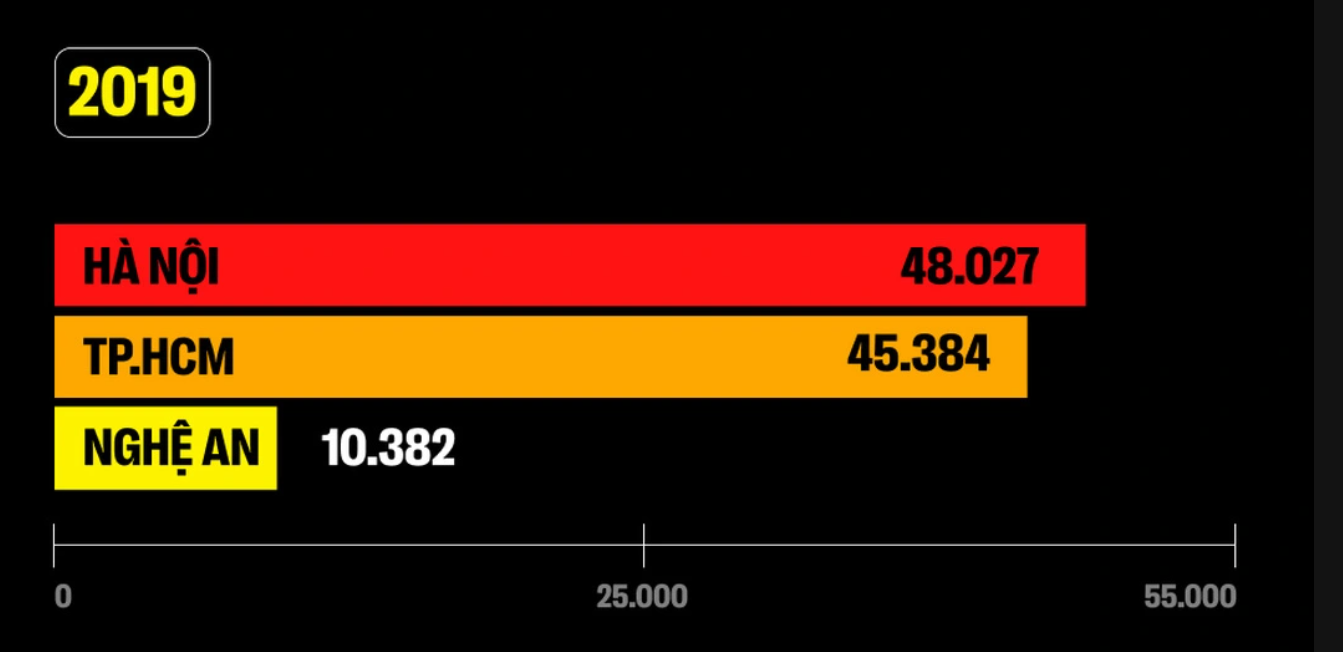
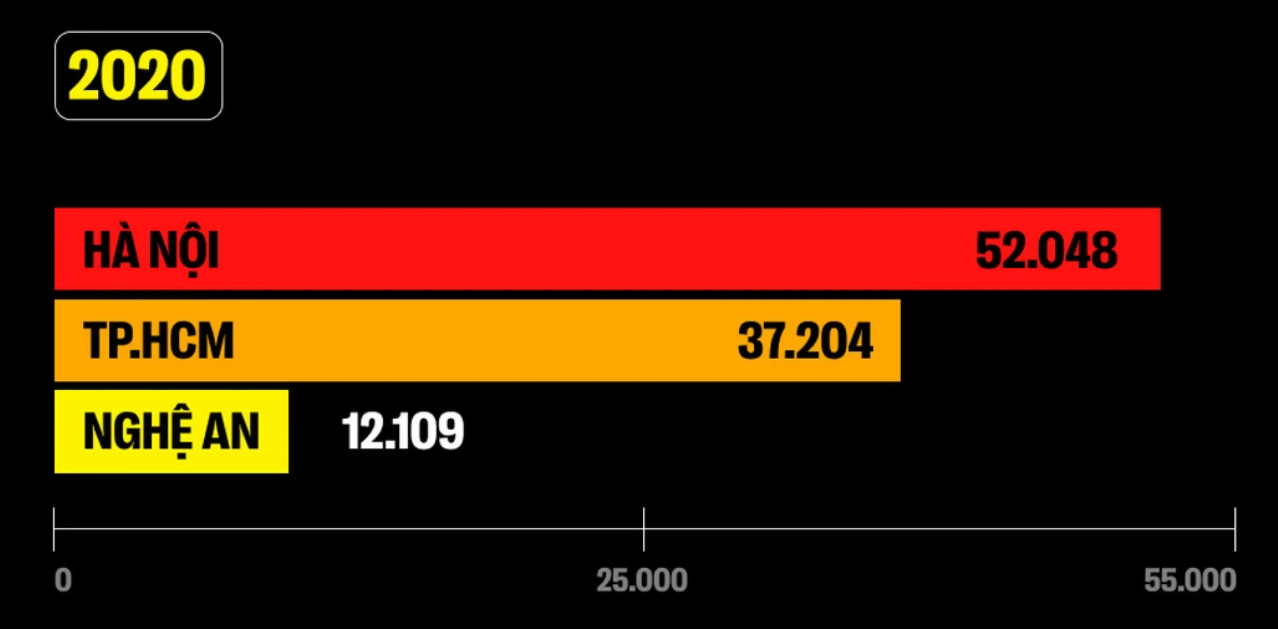
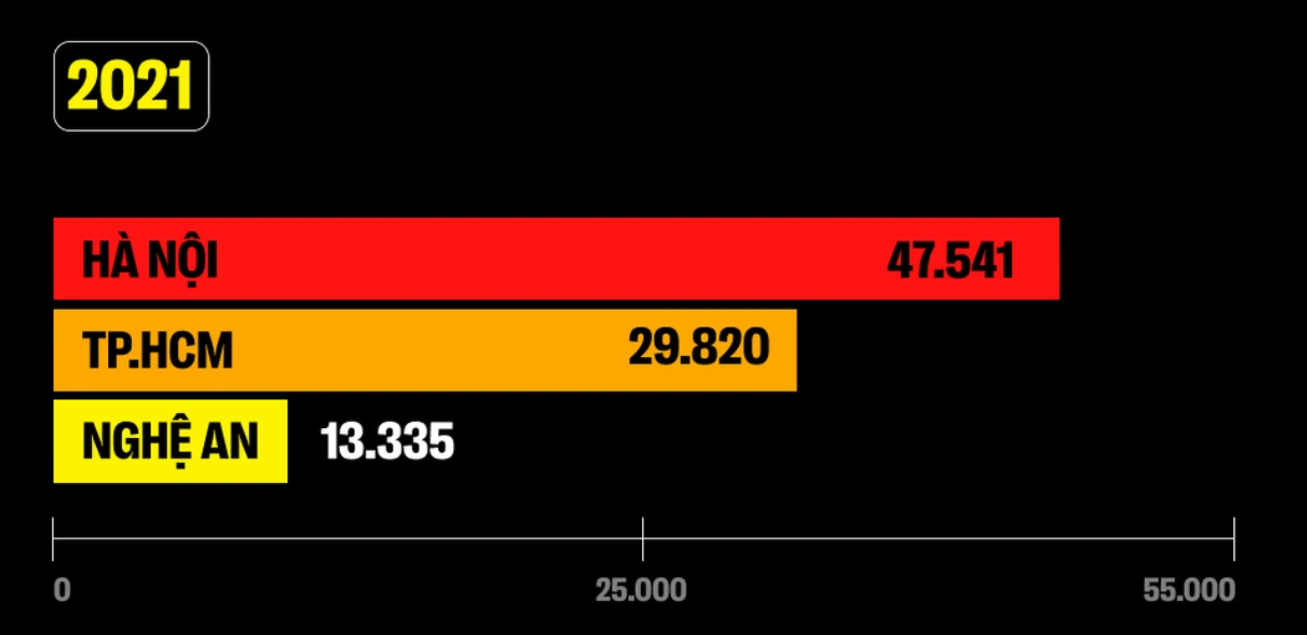
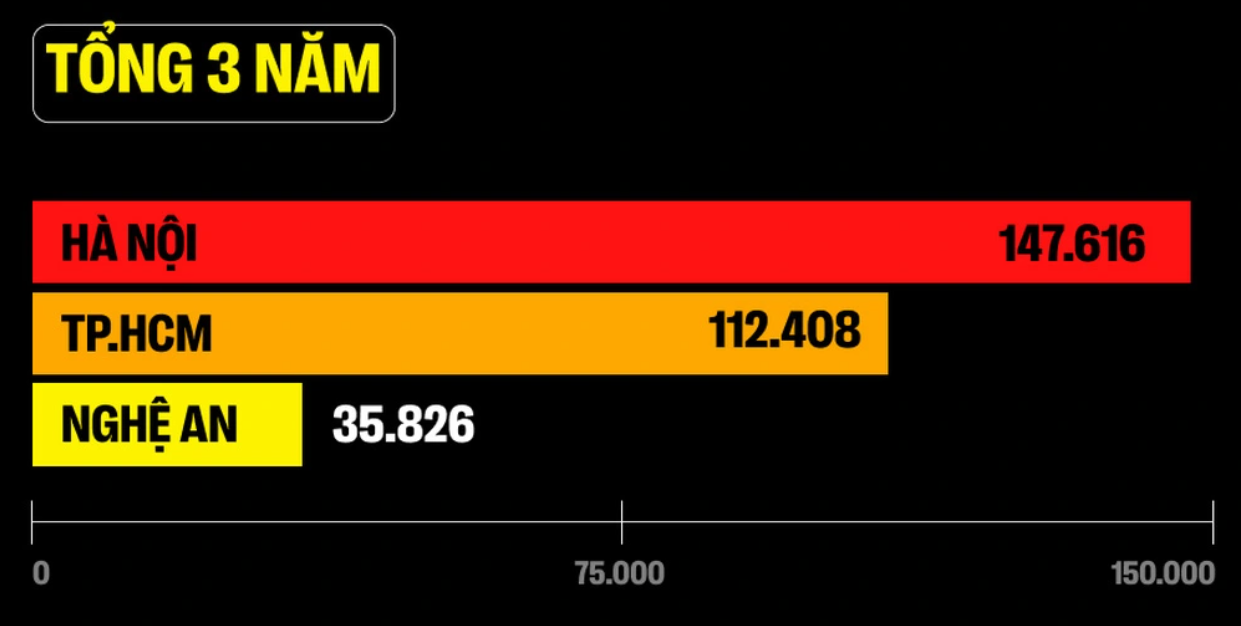

=> bigger market == ['Hà Nội', 'TP HCM']

In [ ]:
# convert year, before or after 2010
df = pandas.concat([df, df['year'].apply(cleanOneCar.convert_year).apply(pandas.Series)], axis=1)
df = df.drop(columns='year')